In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [6]:
def process_igra_file(filename):
    header = ['station', 'year', 'month', 'pressure',
              'height', 'observations']
    with open(filename, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        datum = dict(zip(header, line.split()))
        datum = {k: int(v) if k != 'station' else v
                 for k, v in datum.items()}
        if datum['pressure'] > 1000:
            continue
        data += [datum]
    return pd.DataFrame(data)

In [7]:
dir = 'noaa-igra-monthly-avgs/'
dfs = [process_igra_file(dir + file)
       for file in os.listdir(dir) if 'DS' not in file]

In [8]:
df = pd.concat(dfs)
df.head()

,height,month,observations,pressure,station,year
0,139,1,13,1000,ACM00078861,1947
1,1547,1,13,850,ACM00078861,1947
2,3172,1,13,700,ACM00078861,1947
3,5882,1,13,500,ACM00078861,1947
4,7581,1,11,400,ACM00078861,1947


In [24]:
print("Total observations:", df['observations'].sum())
print("Total stations:", len(df['station'].unique()))
print("Total memory (GB):", df.values.nbytes / (1024**3))
print(f"{df.year.min(), df.year.max()}")

Total observations: 297661699
Total stations: 1526
Total memory (GB): 0.5159492343664169
(1909, 2017)


In [63]:
summary = df.groupby('height')['height', 'pressure'].mean()

In [64]:
import numpy as np
prob_pressure = summary['pressure'] / summary['pressure'].sum()
mean_height = (prob_pressure * summary['height']).sum()
print(mean_height)

def exp_rv(heights, mu=1):
    return np.exp(-heights / mu) * (1 / mu)

summary['predicted_pressure'] = exp_rv(summary['height'], mu=mean_height)
summary['predicted_pressure'] *= 1000 / summary['predicted_pressure'][0]

print(summary.shape)
summary.head()

7333.1511690944235
(33529, 3)


,height,pressure,predicted_pressure
height,,,
0,0.0,1000.0,1000.000000
3,3.0,1000.0,999.590983
4,4.0,1000.0,999.454681
5,5.0,1000.0,999.318397
6,6.0,1000.0,999.182132


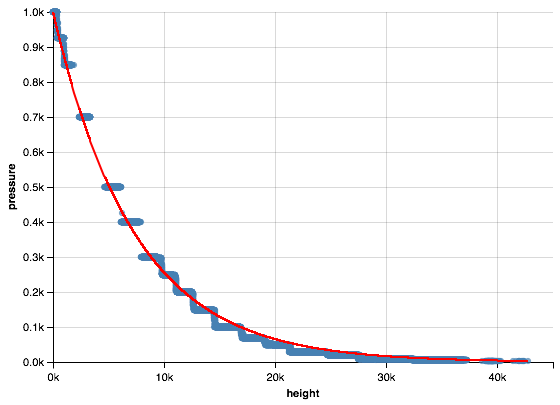

In [80]:
from altair import Chart, LayeredChart
c1 = Chart().mark_circle().encode(
           x='height', y='pressure')
c2 = Chart(description='a').mark_line(color='red').encode(
           x='height', y='predicted_pressure')

LayeredChart(summary, layers=[c1, c2])

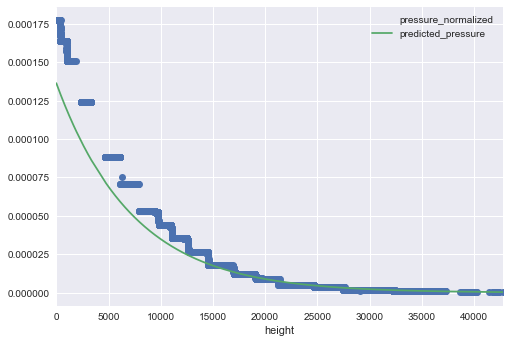

In [61]:
plt.style.use('seaborn')
ax = summary.plot(x='height', y='pressure_normalized', style='o')
summary.plot(x='height', y='predicted_pressure', style='-', ax=ax)
plt.show()

In [87]:
from altair import Color
Color?